<a href="https://colab.research.google.com/github/Rommanahad/Web-scraping-and-EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
weather_2019 = pd.read_excel('/content/weather_2019_clean_data (1) (1).xlsx')

In [ ]:
weather_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     365 non-null    datetime64[ns]
 1   Average temperature(°F)  365 non-null    float64       
 2   Average humidity(°%)     365 non-null    float64       
 3   Average dewpoint(°F)     365 non-null    float64       
 4   Average barometer(in.)   365 non-null    float64       
 5   Average windspeed(mph)   365 non-null    float64       
 6   Average gustspeed(mph)   365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.1 KB


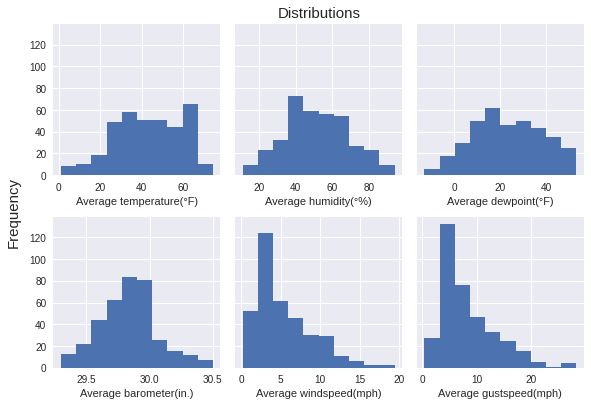

In [ ]:
plt.style.use('seaborn')
fig, axes = plt.subplots(2,3,sharey=True)
axes[0,0].hist(weather_2019['Average temperature(°F)'])
axes[0,1].hist(weather_2019['Average humidity(°%)'])
axes[0,2].hist(weather_2019['Average dewpoint(°F)'])
axes[1,0].hist(weather_2019['Average barometer(in.)'])
axes[1,1].hist(weather_2019['Average windspeed(mph)'])
axes[1,2].hist(weather_2019['Average gustspeed(mph)'])

axes[0,0].set_xlabel('Average temperature(°F)')
axes[0,1].set_xlabel('Average humidity(°%)')
axes[0,2].set_xlabel('Average dewpoint(°F)')
axes[1,0].set_xlabel('Average barometer(in.)')
axes[1,1].set_xlabel('Average windspeed(mph)')
axes[1,2].set_xlabel('Average gustspeed(mph)')

fig.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', size=15)
fig.text(0.45, 1, 'Distributions', va='center', rotation='horizontal', size=15)
plt.tight_layout()
plt.show()

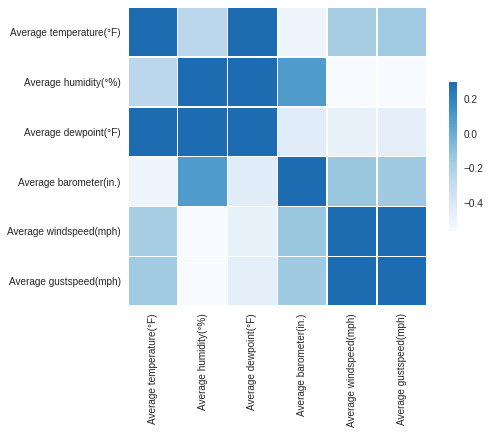

In [ ]:
sns.heatmap(weather_2019[['Average temperature(°F)','Average humidity(°%)','Average dewpoint(°F)','Average barometer(in.)',	'Average windspeed(mph)',	'Average gustspeed(mph)']].corr(),vmax=.3, center=0, cmap="Blues",square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
corr = weather_2019[['Average temperature(°F)','Average humidity(°%)','Average dewpoint(°F)','Average barometer(in.)',	'Average windspeed(mph)',	'Average gustspeed(mph)']].corr()

In [ ]:
# define two data frames one before the drop and one after the drop
weather_2019_before = weather_2019[['Average temperature(°F)','Average humidity(°%)','Average dewpoint(°F)','Average barometer(in.)',	'Average windspeed(mph)',	'Average gustspeed(mph)']]
weather_2019_after = weather_2019.drop(['Average dewpoint(°F)','Average gustspeed(mph)','date'], axis=1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(weather_2019_before)
X2 = sm.tools.add_constant(weather_2019_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)

print('DATA AFTER')
print('-'*100)
display(series_after)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                      29732.068647
Average temperature(°F)       41.583507
Average humidity(°%)          19.898486
Average dewpoint(°F)          42.613985
Average barometer(in.)         1.576385
Average windspeed(mph)        60.267733
Average gustspeed(mph)        59.191872
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const                      28682.017151
Average temperature(°F)        1.915091
Average humidity(°%)           1.913456
Average barometer(in.)         1.556899
Average windspeed(mph)         1.978292
dtype: float64

In [ ]:
#detecting outliers 

desc_weather_2019 = weather_2019.describe()

#add standard deviation
desc_weather_2019.loc['+3_std'] = desc_weather_2019.loc['mean'] + (desc_weather_2019.loc['std'] * 3)
desc_weather_2019.loc['-3_std'] = desc_weather_2019.loc['mean'] - (desc_weather_2019.loc['std'] * 3)

desc_weather_2019


,Average temperature(°F),Average humidity(°%),Average dewpoint(°F),Average barometer(in.),Average windspeed(mph),Average gustspeed(mph)
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,42.947397,51.451233,22.976986,29.823836,5.412877,8.244932
std,15.722993,17.314171,15.073050,0.225702,3.611790,5.071230
min,1.000000,11.000000,-12.900000,29.300000,0.200000,0.400000
25%,31.500000,39.000000,11.900000,29.700000,2.700000,4.500000
50%,43.600000,49.000000,21.400000,29.800000,4.200000,6.400000
75%,56.000000,65.000000,35.300000,30.000000,7.400000,10.900000
max,74.400000,94.000000,53.000000,30.500000,19.400000,28.300000
+3_std,90.116375,103.393747,68.196136,30.500941,16.248246,23.458621
-3_std,-4.221581,-0.491281,-22.242163,29.146730,-5.422493,-6.968758


In [ ]:
weather_2019= weather_2019.set_index('date')
#checking for outliers and removing them
weather_2019_remove_df = weather_2019[(np.abs(stats.zscore(weather_2019)) < 3).all(axis=1)]


#which indexs were removed?
weather_2019.index.difference(weather_2019_remove_df.index)


DatetimeIndex(['2019-02-13', '2019-02-28', '2019-11-24', '2019-11-30'], dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
weather_2019_remove_df

,Average temperature(°F),Average humidity(°%),Average dewpoint(°F),Average barometer(in.),Average windspeed(mph),Average gustspeed(mph)
date,,,,,,
2019-01-01,2.4,67.0,-6.5,30.4,0.2,0.4
2019-01-02,13.7,57.0,-0.8,30.3,0.4,0.7
2019-01-03,31.9,45.0,10.0,30.0,3.3,5.1
2019-01-04,44.0,24.0,9.1,29.8,10.0,13.8
2019-01-05,43.7,25.0,7.9,29.8,6.4,9.4
...,...,...,...,...,...,...
2019-12-27,17.0,70.0,7.6,30.0,1.3,2.3
2019-12-28,17.8,76.0,11.3,29.8,2.9,4.4
2019-12-29,15.0,45.0,-2.7,30.0,10.6,15.3


In [ ]:
#final dataframe for creating model
final_weather_2019=weather_2019_remove_df.drop(['Average dewpoint(°F)','Average gustspeed(mph)'], axis=1)

,Average temperature(°F),Average humidity(°%),Average barometer(in.),Average windspeed(mph)
date,,,,
2019-01-01,2.4,67.0,30.4,0.2
2019-01-02,13.7,57.0,30.3,0.4
2019-01-03,31.9,45.0,30.0,3.3
2019-01-04,44.0,24.0,29.8,10.0
2019-01-05,43.7,25.0,29.8,6.4
...,...,...,...,...
2019-12-27,17.0,70.0,30.0,1.3
2019-12-28,17.8,76.0,29.8,2.9
2019-12-29,15.0,45.0,30.0,10.6


In [ ]:
final_weather_2019.to_excel("final_weather_2019.xlsx")